**Ejercicio 1.2**

Suponga que usamos perceptron oara detectar mensajes de spam. Digamos que cada mensaje de correo es representado por la frecuencia de ocurrencia de palabras clave, y la salida es +1 si el mensaje es considerado spam.

(a) ¿Puedes pensar en algunas palabras clave que tendrían un gran peso positivo en el perceptron?

(b) ¿Qué hay de palabras clave que tendrán un peso negativo?

(c) ¿Qué parámetro en el perceptron afecta directamente la cantidad de mensajes fronterizos que terminan clasificados como spam?



**Solución**

**(a)** Palabras clave con peso positivo:


*   Ganar
*   Gratis
*   Económico
*   Promoción
*   Imperdible
*   Oferta
*   Premio

**(b)** Palabras clave con peso positivo:


*   Buen día
*   Hola
*   El
*   La
*   Los
*   Con
*   De

**(c)** En la fórmula de perceptrón $h(x)= \text{sign} \left(\left(\sum_{i=1}^{d}w_ix_i\right)+b\right)$, el parámetro $b$ que representa el bias que determia el threshold es el que afecta directamente la cantidad de mensajes fronterizos que son clasificados como spam. Esto se debe a que $b$ determina el límite en el cual los mensajes se clasifican como spam o no spam.



---



**Ejercicio 1.3**

La regla de actualización del peso en (1.3) tiene la interpretación de que se mueve en dirección de clasificar $\textbf{x}(t)$ correctamente.

(a) Muestre que $y(t)\textbf{w}^T(t)\textbf{x}(t)<0$. [Pista: $\textbf{x}(t)$ es mal clasificado por $\textbf{w}(t)$.]

(b) Muestre que $y(t)\textbf{w}^T(t+1)\textbf{x}(t)>y(t)\textbf{w}^T(t)\textbf{x}(t)$. [Pista: Use (1.3).]

(c) En lo que a clasificar $\textbf{x}(t)$ se refiere, argumente que el movimiento de $\textbf{w}(t)$ a $\textbf{w}(t+1)$ es un movimiento "en la dirección correcta".

**Solución**

**(a)** Si tenemos que $\textbf{x}(t)$ es mal clasificada por $\textbf{w}(t)$, entonces tendremos que $\textbf{w}^T(t)\textbf{x}(t)$ tiene signo ditinto a $y(t)$, por lo tanto, $y(t)\textbf{w}^T(t)\textbf{x}(t)<0$.

**(b)** Observe lo siguiente:

$y(t)w^T(t+1)x(t)=y(t)(w(t)+y(t)x(t))$

$= y(t)(w^T+y(t)x^T(t))x(t)$

$=y(t)w^Tx(t)+y(t)y(t)x^T(t)x(t) >y(t)w^T(t)x(t)$

donde la primera igualdad se tiene por (1.3) y la última desigualdad debido a que el último término de la suma es mayor o igual a 0.

**(c)** Del problema anterios tenemos que $y(t)w^T(t)x(t)$ aumenta con cada actualización. Así, si tenemos que $y(t)$ es positivo y $w^T(t)x(t)$ negativo, nos movemos $w^T(t)x(t)$ hacia el lado positivo incrementándolo.

Por otro lado, si tenemos que $y(t)$ es negativo y $w^T(t)x(t)$ positivo, el hecho de que $y(t)w^T(t)x(t)$ aumente implica que $w^T(t)x(t)$ está disminuyendo, es decir, se mueve hacia el lado negativo.

Por lo tanto, el movimiento de $w(t)$ a $w(t+1)$ es en la dirección correcta.




---



**Ejercicio 1.10**

Aquí hay un experimento que ilustra la diferencia entre un solo contenedor y múltiples contenedores. Correr una simulación para lanzar 1000 monedas justas. Lance cada moneda independientemente 10 veces. Concentrémonos en 3 monedas de la siguiente forma: $c_1$ es la primer moneda lanzada; $c_{\text{rand}}$ es una moneda que usted escoge aleatoriamente; $c_{\text{min}}$ es la moneda que tuvo la mínima frecuencia de caras (escoja la primera en caso de empate). Sean $v_1, v_{\text{ran}}$ y $v_{\text{min}}$ la fracción de caras que obtuvo para las tres monedas respectivas.

(a) ¿Qué es $\mu$ para las tres monedas seleccionadas?

(b) Repita este experimento un número grande de veces (e.g., 100000 crorridas del experimento completo) para obtener varias instancias de $v_1, v_{\text{ran}}$ y $v_{\text{min}}$ y grafique los histogramas de las distribuciones de $v_1, v_{\text{ran}}$ y $v_{\text{min}}$. Note que las monedas que terminan siendo $c_{\text{rand}}$ y $c_{\text{min}}$ pueden ser diferentes de una corrida  ala otra.

(c) Usando (b), grafique estimados para $\mathbb{P}[|v-\mu|>\epsilon]$ como función de $\epsilon$, junto con la cota de Hoeffding $2e^{-2\epsilon^2N}$ (en el mismo gráfico).

(d) ¿Cuáles monedas obedecen la cota de Hoeffding, y cuáles no? Explique por qué.

(e) Relacione la parte (d) a los contenedores múltiples en la figura 1.10.

**Solución**

**(a)**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def flip_coins(total_coins):
    """Lanzamos todas las monedas una vez y devolvemos el estado head/tail
    correspondiente
    """
    
    hts = np.zeros(total_coins) #cara: 1, sello: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

In [4]:
#Creamos una función que ejecute una simulación de lanzar múltiples monedas un 
#número de veces específico
#Tomamos 3 parámetros que inicializarán las variables v1, vrand y vmin
def run_una(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    #Generamos un índice de monedas crand
    crand = np.random.choice(total_coins)
    #Guardamos el número de caras en total_flips
    hts_sum = np.zeros(total_coins) 
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    #Calculamos la frecuencia de caras por moneda dividiendo los siguientes valores
    hts_freq = hts_sum/total_flips
    
    #La frecuencia de la primer moneda se asigna a v1
    v1 = hts_freq[0]
    #La frecuencia de la moneda aleatoria se asigna a vrand
    vrand = hts_freq[crand]
    #Encontramos la moneda con mínima frecuencia y asignamos su frecuencia a vmin
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    #Imprimimos las frecuencias
    if print_freq:
        print('Frecuencia de la primer moneda: {}'.format(v1))
        print('Frecuencia de la moneda aleatoria: id({})-freq({})'.format(crand, vrand))
        print('Frecuencia de la moneda con mínima frecuencia: id({})-freq({})'.format
         (cmin, vmin))
    return v1,vrand,vmin


In [5]:
# Ejercicio 1.10 (a) 
total_coins = 1000
total_flips = 10
run_una(total_coins, total_flips, True)

Frecuencia de la primer moneda: 0.6
Frecuencia de la moneda aleatoria: id(558)-freq(0.5)
Frecuencia de la moneda con mínima frecuencia: id(83)-freq(0.0)


(0.6, 0.5, 0.0)

**(b)**

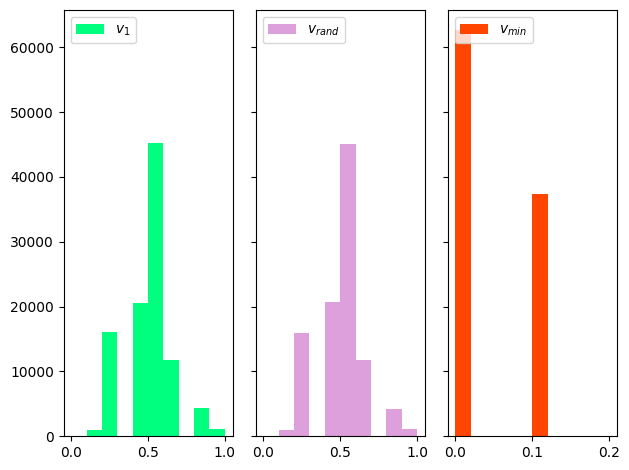

In [21]:
#Ejercicio 1.10 (b)
#Realizamos una simulación para estudar los valores de v, vrand, vmin al correrlo 
#10000 veces 
total_coins = 1000
total_flips = 10
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_una(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)
#Generamos una figura con 3 subplots usando 'hist' para graficar histogramas de
#las frecuencias de caras obtenidas por la primer moneda, la moneda aleatoria y 
#la de mínima frecuencia 
fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
#Fijaremos el número de contenedores a 10
n_bins = 10
axs[0].hist(v1s,bins=n_bins, color='springgreen', label='$v_1$')
axs[1].hist(vrands,bins=n_bins, color='plum', label='$v_{rand}$')
axs[2].hist(vmins,bins=n_bins, color='orangered',label='$v_{min}$')
# Agregar leyenda

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

# Mostrar el gráfico
plt.savefig('Histogramas.svg', format='svg')
plt.show()

**(c)**

In [22]:
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

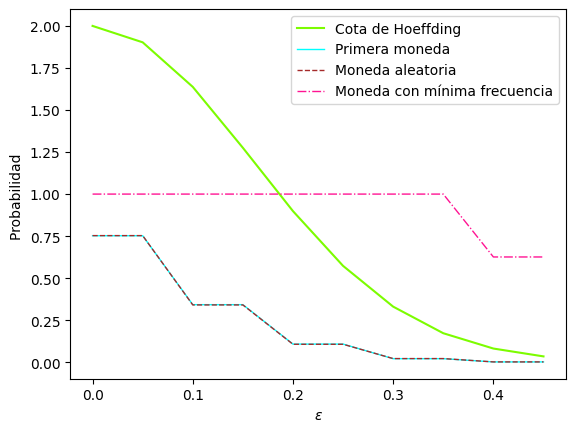

In [34]:
#Ejercicio 1.10 (c)
#Debemos computar las distancias entre las frecuencias observadas y la media 0.5
#Creamos para épsilon una sucesión de vlaores entre 0.0 y 0.45 y calculamos
#las cotas de Hoeffding para cada épsilon
eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
#Convertimos v1s, vrands y cmins en arreglos y luego calculamos el valor absoluto
# de las diferecias entre las frecuencias observadas y 0.5
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))
#Calculamos las probabilidades para cada valor de épsilon
for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01)) 
#Graficamos la cota de Hoeffding y las probabilidades estimadas en el mismo gráfico

plt.plot(eps, bounds, 
         color='lawngreen', label='Cota de Hoeffding')
plt.plot(eps, p1, marker='', color='cyan', linewidth=1, label='Primera moneda')
plt.plot(eps, prand, marker='', color='brown', linewidth=1, linestyle='dashed', 
         label='Moneda aleatoria')
plt.plot(eps, pmin, marker='', color='deeppink', linewidth=1, linestyle='dashdot', 
         label='Moneda con mínima frecuencia')
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probabilidad ')
plt.legend()

**(d)** La primera moneda y la moneda aleatoria siguen la cota de Hoeffding, mientras que la moneda con mínima frecuencia no lo hace. La condición para la desigualdad de Hoeffding dice que las hpótesis $h$ deben ser escogidas antes del muestreo, es decir, es necesario escoger los contenedores previamente. Como las primeras dos monedas son escogidas antes de la realización del experimento y la última es escogida luego de lanzar todas las monedas, esto conlleva a que las primeras sigan la desigualdad y la última no.

**(e)** La figura y la parte (d) se relacionan al momento de escoger la mineda que tiene mínima frecuencia de caras, lo podemos ver como si escogieramos un contenedor de 1000 contenedores. Sin embargo, como se mencionó anteriormente, se escoge el contenedor luego de haber muestreado los datos, lo cual se relaciona al algoritmo de aprendizaje para la hipótesis final. Mientras que las otras dos monedas se seleccionan antes del muestreo, por lo tanto, se puede ver como escoger el contenedor previamente.



---



**Ejercicio 1.11**

Se nos da un dataset $\mathcal{D}$ de 25 ejemplos de entrenamiento de una función objetivo desconocida $f: \mathcal{X} \rightarrow \mathcal{Y}$, donde $\mathcal{X} = \mathbb{R}$ y $\mathcal{Y}=\{-1,+1\}$. Para arender $f$, usamos un conjunto de hipótesis simple $\mathcal{H}=\{h_1,h_2\}$ donde $h_1$ es la función constante $+1$ y $h_2$ es la función constante $-1$.

Consideramos dos algoritmos de aprendizaje, S (smart) y C (crazy). S escoge la hipótesis que más concuerda con $\mathcal{D}$ y C escoge la otra hipótesis deliberadamente. Veamos como estos algoritmos se comportan fuera de muestra desde los puntos de vista determinista y probabilístico. Suponga en la visión probabilística que existe una distribución de probabilidad sobre $\mathcal{X}$, y sea $\mathbb{P}[f(x)=+1]=p$.

(a) ¿Puede S producir una hipótesis que garantice comportarse mejor que la aleatoriedad sobre cualquier punto fuera de $\mathcal{D}$?

(b) Suponga para el resto del ejercicio que todos los ejemplos en $\mathcal{D}$ tienen $y_n=+1$. ¿Es posible que la hipótesis que produce C resulte ser mejor que la hipótesis que produce S?

(c) Si $p=0.9$, ¿Cuál es la probabilidad de que S produzca una mejor hipótesis que C?

(d) ¿Existe algún valor para $p$ para el cual es más probable que C produzca una mejor hipótesis que S?

**Solución**

**(a)** Si $f$ tiene veinticinco $+1$ en $\mathcal{D}$ y $-1$ en el resto de puntos de $\mathcal{X}$ entonces S escogerá la hipótesis $h_1$, lo cual no concordará con $f$ fuera de $\mathcal{D}$. Por otro lado, una función aleatoria tendrá $+1$ y $-1$ en la misma proporción, así que concordará con $f$ la mitad de las veces, lo cual es mejor que la función producida por S. Por lo tanto, S no puede producir una hipótesis que garantice comportarse mejor que la aleatoriedad sobre cualquier punto fuera de $\mathcal{D}$.

**(b)** El ejemplo mostrado anteriormente nos muestra que es posible que C produzca una mejor hipótesis que S.

**(c)** Si todo punto en $\mathcal{D}$ tiene $+1$, entonces S escogerá $h_1$ y C escogerá $h_2$. Entoces, fuera de $\mathcal{D}$, $h_1$ tendrá $90%$ de probabilidad de concordar con $f$. Por lo tanto S siempre producirá mejor hipótesis que C.

**(d)** Del ejercicio anterior se tiene que cuando $p<0.5$ C producirá mejor hipótesis que S.



---



**Ejercicio 1.12**

Una amiga se te acerca con un problema de aprendizaje. Ella dice qu ela función objetivo es completamente desconocida, pero ella tiene 4000 datos. Ella está dispuesta a pagarte por resolver su problema y producir para ella una $g$ que aproxime $f. ¿Qué es lo mejor que le puedes prometer entr lo siguiente:

(a) Después de aprender le proveerás una $g$ que grantizarás que aproxime bien a $f$ fuera de la muestra.

(b) Después de aprender le proveerás una $g$, y con alta probabilidad la $g$ que produjiste aproximará bien $f$ fuera de la muestra.

(c) Una de dos cosas pasarán.


> (i) Producirás una hipótesis $g$;


> Declararás que has fallado.


> Si devuelves una hipótesis $g$, entonces con alta probabilidad la $g$ que produjiste aproximará bien a $f$ fuera de la muestra.







**Solución**

Debido a que la función objetivo $f$ puede ser demasiado compleja, existe la posibilidad de que no se garantice el aprendizaje. Además, si podemos aprender y producir una hipótesis $g$, como tenemos bastantes puntos, por la desigualdad de Hoeffding tenemos que la probabilidad de que $g$ se parezca a $f$ es alta, por lo tanto, el error en $g$ será pequeño.

De esto se concluye que lo mejor que le podemos prometer a la persona es (c).